In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_7.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_7.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.97321774  0.28487344 -0.07453987 -0.95726885  0.26850045 -0.07232388
  -0.94840786  0.27418931 -0.057514   -0.94963199  0.30258225 -0.05828972
  -1.02465111  0.3116654  -0.07852802 -1.00796787  0.28013023 -0.09771487
  -0.98189961  0.27363221 -0.07442115 -0.97692503  0.32693841 -0.08865975
  -1.09115974  0.35497121 -0.04154939 -1.15242376  0.35775686 -0.09569425
  -1.09076841

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(88236, 48) (88236, 7) training data size
(29413, 48) (29413, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()


Model: "Rectangular_4by4_sensor_concept_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense (Dense)                (None, 700)               34300     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4907      
Total params: 529,907
Trainable params: 529,907
Non-trainable params: 0
_________________________________________________________________


In [5]:
#from keras.utils import plot_model
#keras.utils.plot_model(model)
#plot_model(model, to_file='Model_Architecture_9p.png', dpi=1200, show_shapes=True, show_layer_names=True)

In [6]:
history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
#history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, callbacks=my_callbacks, validation_data=(xval_scale,yval_scale))


Epoch 1/20
2758/2758 - 12s - loss: 0.0422 - accuracy: 0.5380 - val_loss: 0.0339 - val_accuracy: 0.4845
Epoch 2/20
2758/2758 - 12s - loss: 0.0242 - accuracy: 0.6303 - val_loss: 0.0412 - val_accuracy: 0.5183
Epoch 3/20
2758/2758 - 12s - loss: 0.0198 - accuracy: 0.6581 - val_loss: 0.0263 - val_accuracy: 0.6669
Epoch 4/20
2758/2758 - 12s - loss: 0.0177 - accuracy: 0.6688 - val_loss: 0.0298 - val_accuracy: 0.5731
Epoch 5/20
2758/2758 - 12s - loss: 0.0162 - accuracy: 0.6773 - val_loss: 0.0292 - val_accuracy: 0.6585
Epoch 6/20
2758/2758 - 12s - loss: 0.0150 - accuracy: 0.6848 - val_loss: 0.0391 - val_accuracy: 0.5362
Epoch 7/20
2758/2758 - 12s - loss: 0.0144 - accuracy: 0.6878 - val_loss: 0.0428 - val_accuracy: 0.5310
Epoch 8/20
2758/2758 - 12s - loss: 0.0134 - accuracy: 0.6940 - val_loss: 0.0566 - val_accuracy: 0.5032
Epoch 9/20
2758/2758 - 12s - loss: 0.0130 - accuracy: 0.6937 - val_loss: 0.0510 - val_accuracy: 0.5653
Epoch 10/20
2758/2758 - 12s - loss: 0.0120 - accuracy: 0.7022 - val_loss:

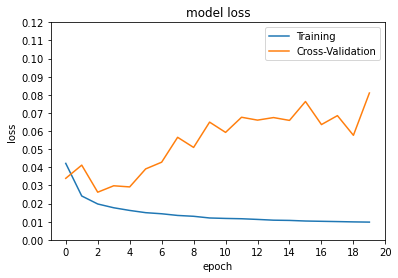

In [7]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training ', 'Cross-Validation'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.13, 0.01))
plt.savefig('Model_Loss_7p_mse.png', dpi=1200)
plt.show()

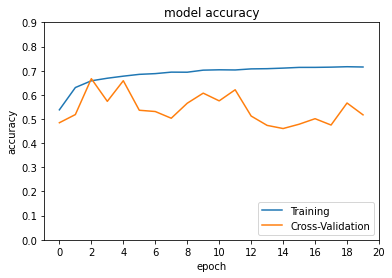

In [8]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training ', 'Cross-Validation'], loc='lower right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 1.0, 0.1))
plt.savefig('Model_Accuracy_7p_mse.png', dpi=1200)
plt.show()